# Random Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [6]:
df =pd.read_csv('dataset\\train.csv', usecols =['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
X=df.drop(columns =['Survived'])
Y=df['Survived']

In [9]:
X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=4)

In [10]:
X_train['Age_imputed'] =X_train['Age']
X_test ['Age_imputed'] =X_test['Age']

In [11]:
X_train.head()

,Age,Fare,Age_imputed
42,NaN,7.8958,NaN
684,60.0,39.0000,60.0
605,36.0,15.5500,36.0
409,NaN,25.4667,NaN
740,NaN,30.0000,NaN


In [12]:
# random filling
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] =X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\dell\AppData\Local\Temp\ipykernel_13464\2989593048.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] =X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:\

improved version of code

In [14]:
X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=4)

In [15]:
X_train['Age_imputed'] =X_train['Age']
X_test ['Age_imputed'] =X_test['Age']

In [16]:
# Randomly fill missing 'Age_imputed' values in training set
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_train['Age'].dropna().sample(
        X_train['Age_imputed'].isnull().sum(), replace=True, random_state=42
    ).values
)

# Randomly fill missing 'Age_imputed' values in testing set
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    X_test['Age'].dropna().sample(
        X_test['Age_imputed'].isnull().sum(), replace=True, random_state=42
    ).values
)


In [17]:
X_train.head()

,Age,Fare,Age_imputed
42,NaN,7.8958,40.0
684,60.0,39.0000,60.0
605,36.0,15.5500,36.0
409,NaN,25.4667,32.0
740,NaN,30.0000,59.0


C:\Users\dell\AppData\Local\Temp\ipykernel_13464\3785079725.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Orginal',hist=False)
C:\Users\dell\AppData\Local\Temp\ipykernel_13464\3785079725.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Ag

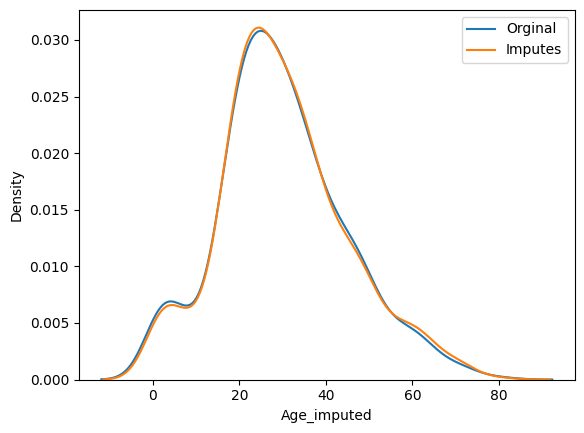

In [20]:
sns.distplot(X_train['Age'],label='Orginal',hist=False)

sns.distplot(X_train['Age_imputed'],label ='Imputes',hist=False)

plt.legend()
plt.show()

In [21]:
print('Orginal varible varince :' ,X_train['Age'].var())
print('Variance after random Imputation :', X_train['Age_imputed'].var())

Orginal varible varince : 212.94777780686337
Variance after random Imputation : 214.97402960520074


In [23]:
X_train[['Age','Age_imputed','Fare']].cov()

,Age,Age_imputed,Fare
Age,212.947778,212.947778,53.997398
Age_imputed,212.947778,214.974030,52.297170
Fare,53.997398,52.297170,2782.831689


<Axes: >

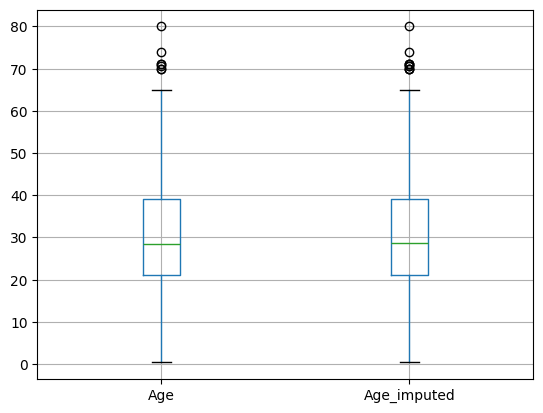

In [25]:
X_train[['Age','Age_imputed']].boxplot()

In [34]:
# for same input of fare same value of age randomly selcted should be same
sample_value =X_train['Age'].dropna().sample(1,random_state =int(observation['Fare']))

NameError: name 'observation' is not defined

In [35]:
data =pd.read_csv('dataset\\train_housing_data.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [36]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [37]:
X =data
Y=data['SalePrice']

In [39]:
X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=4)

In [40]:
X_train['GarageQual_imputed'] =X_train['GarageQual']
X_test['GarageQual_imputed'] =X_test['GarageQual']

X_train['FireplaceQu_imputed'] =X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] =X_test['FireplaceQu']

In [45]:
X_train.loc[X_train['GarageQual_imputed'].isnull(),'GarageQual_imputed'] =X_train['GarageQual'].dropna().sample(X_train['GarageQual_imputed'].isnull().sum(),replace =True,random_state =42).values
X_test.loc[X_test['GarageQual_imputed'].isnull(),'GarageQual_imputed'] =X_test['GarageQual'].dropna().sample(X_test['GarageQual_imputed'].isnull().sum(),replace=True,random_state =42).values

In [48]:
X_train.loc[X_train['FireplaceQu_imputed'].isnull(),'FireplaceQu_imputed'] =X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu_imputed'].isnull().sum(),replace =True,random_state =42).values
X_test.loc[X_test['FireplaceQu_imputed'].isnull(),'FireplaceQu_imputed'] =X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu_imputed'].isnull().sum(),replace=True,random_state =42).values

In [49]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
666,Po,TA,129000,TA,Po
226,TA,TA,290000,TA,TA
155,NaN,NaN,79000,TA,TA
231,TA,TA,403000,TA,TA
901,NaN,TA,153000,TA,Fa


In [52]:
# checking the frequency
temp =pd.concat([X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),X_train['GarageQual_imputed'].value_counts() / len(X_train)],axis =1)

temp.columns=['Orginal','Imputed']

In [53]:
temp


,Orginal,Imputed
TA,0.951686,0.951199
Fa,0.033728,0.035103
Gd,0.009116,0.008562
Po,0.002735,0.002568
Ex,0.002735,0.002568


In [56]:
# checking the frequency
temp1 =pd.concat([X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),X_train['FireplaceQu_imputed'].value_counts() / len(X_train)],axis =1)

temp1.columns=['Orginal','Imputed']
temp1

,Orginal,Imputed
Gd,0.482702,0.474315
TA,0.411862,0.424658
Fa,0.047776,0.052226
Ex,0.032949,0.029110
Po,0.024712,0.019692


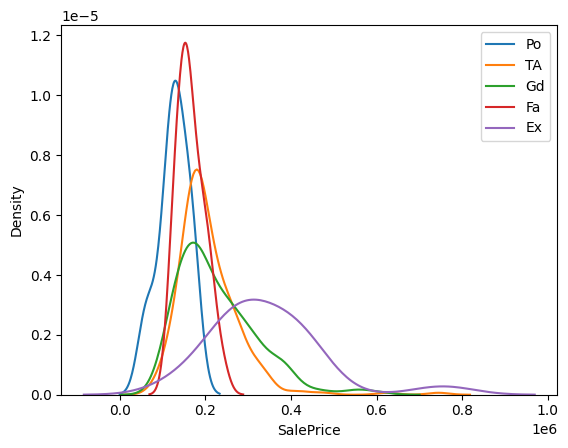

In [67]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] ==category]['SalePrice'],fill=False,label=category)
plt.legend()
plt.show()

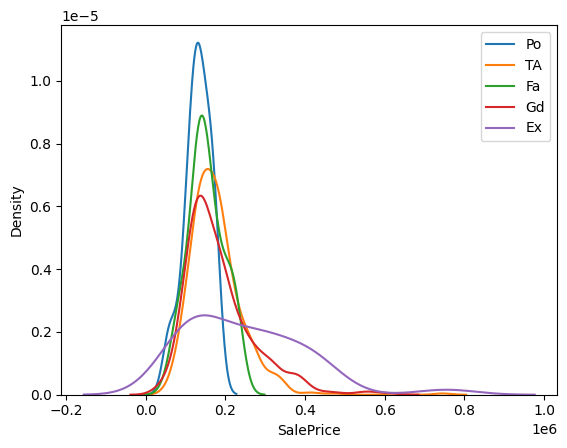

In [66]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] ==category]['SalePrice'],fill=False,label=category)
plt.legend()
plt.show()

# Missing Indicator

In [86]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [85]:
df =pd.read_csv('dataset\\train.csv', usecols =['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [87]:
X=df.drop(columns =['Survived'])
Y=df['Survived']
X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=4)

In [78]:
si =SimpleImputer()
X_train_trf =si.fit_transform(X_train)
X_test_trf =si.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression()

clf.fit(X_train_trf,Y_train)

y_pred =clf.predict(X_test_trf)


from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)



0.6927374301675978

In [92]:
X=df.drop(columns =['Survived'])
Y=df['Survived']
X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=4)

In [93]:
# missing indicator 
mi =MissingIndicator()
mi.fit(X_train)


MissingIndicator()

In [94]:
X_train_mi =mi.transform(X_train)


In [95]:
X_test_mi =mi.transform(X_test)

In [96]:
X_train['Age_NA'] = X_train_mi


In [97]:
X_test['Age_NA'] =X_test_mi

In [98]:
mi.features_

array([0], dtype=int64)

In [99]:
X_train

,Age,Fare,Age_NA
42,NaN,7.8958,True
684,60.0,39.0000,False
605,36.0,15.5500,False
409,NaN,25.4667,True
740,NaN,30.0000,True
...,...,...,...
360,40.0,27.9000,False
709,NaN,15.2458,True
439,31.0,10.5000,False
174,56.0,30.6958,False


In [101]:
si =SimpleImputer()
X_train_trf1 =si.fit_transform(X_train)

In [103]:

X_test_trf1 =si.transform(X_test)

In [104]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression()

clf.fit(X_train_trf1,Y_train)

y_pred =clf.predict(X_test_trf1)


from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7094972067039106

 Without using Missing Indicator  inplace use simpleImputer(add_indicator =True) ; default = False so u put it True

In [105]:
X=df.drop(columns =['Survived'])
Y=df['Survived']
X_train ,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2 ,random_state=4)

In [108]:
si =SimpleImputer(add_indicator=True)
X_train_trf =si.fit_transform(X_train)
X_test_trf =si.transform(X_test)

In [109]:
from sklearn.linear_model import LogisticRegression

clf =LogisticRegression()

clf.fit(X_train_trf,Y_train)

y_pred =clf.predict(X_test_trf)


from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.7094972067039106